# Week 6. Optimization. Programming Task

Let us consider the **House Pricing** dataset, where you have a lot of information about the houses being sold and you aim to produce the price of the house. 

**To submit your answers you will need to copy your token from next task ‘Programming: Final project’.**

**NOTE: you should write an optimal code: try avoiding cycles and use `numpy` instead! Optimality of your code will be graded out of 2 points**

Firstly, let us import basic libraries (`numpy` ([docs](https://numpy.org/)) for matrix operations and `pandas` ([docs](https://pandas.pydata.org/)) for convinient dataset workaround):

In [1]:
import numpy as np
import pandas as pd

### Task 1. Reading 

In [2]:
datX=np.load('x_train.npy')
datY=np.log(np.load('y_train.npy'))
datX=pd.DataFrame(datX, columns=datX.dtype.names)
datX

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,2014-09-16,5.0,3.25,3710,34200,2.0,False,3,8,2510,1200,1986,0,98074,47.610100,-122.046997
1,2014-11-18,3.0,1.75,2820,8879,1.0,False,5,7,1540,1280,1920,1957,98146,47.509399,-122.375999
2,2014-11-10,3.0,1.00,1240,239144,1.0,False,3,6,1240,0,1921,1992,98038,47.430302,-122.045998
3,2015-04-16,4.0,2.50,2670,8279,2.0,False,3,7,2670,0,1999,0,98148,47.429199,-122.328003
4,2014-07-23,3.0,2.25,2700,4025,2.0,False,4,8,1760,940,1907,0,98122,47.607399,-122.293999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2014-05-21,4.0,2.75,2290,6120,2.0,False,4,7,2170,120,1926,0,98115,47.674599,-122.327003
14996,2015-04-01,3.0,2.00,1430,9250,1.0,False,4,8,990,440,1983,0,98052,47.695202,-122.096001
14997,2014-07-11,2.0,1.00,640,7768,1.0,False,3,6,640,0,1942,0,98106,47.514999,-122.359001
14998,2014-05-15,3.0,1.00,1630,10304,1.0,False,5,7,1630,0,1953,0,98155,47.754799,-122.317001


Okay, we manage to load the data (you can read more about the `load` [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.load.html). But it is not a necessity). We are going to use linear models to work with it, but firstly we need to come up with idea what features should we include in the model at all (which feature the price is lineary dependent on):

Do not forget to install seaborn. You can do that by running `pip install seaborn` in the command line locally, or simply by running the next sell:

In [3]:
!pip install seaborn

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
You should consider upgrading via the '/home/user/anaconda3/envs/scientificProject/bin/python -m pip install --upgrade pip' command.


In order to do it let us plot every feature vs the price. Firstly, we import nice plotting modules:

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

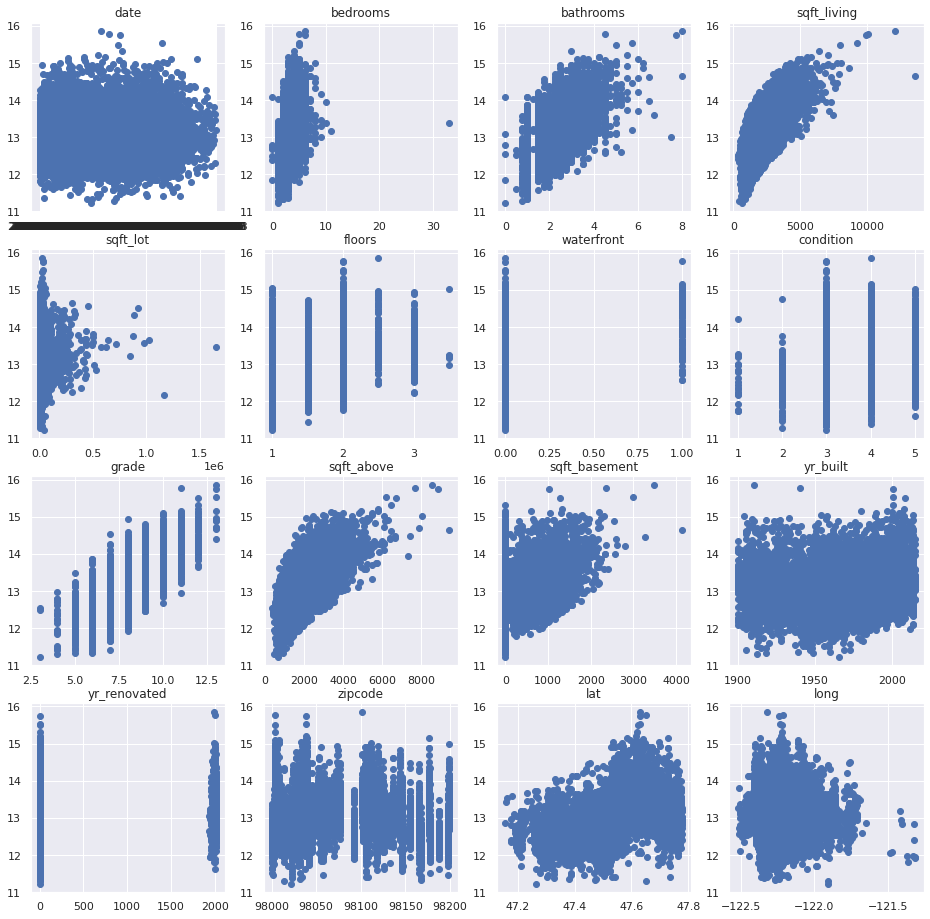

In [25]:
f, ax=plt.subplots(4, 4, figsize=(16,16))

for i, name in enumerate(datX.columns):
    ax[i//4][i%4].scatter(datX[name], datY)
    ax[i//4][i%4].set_title(name)

Let us say, that we choose to work the following set of features:
+ `bedrooms`
+ `bathrooms`
+ `sqft_living`
+ `floors`
+ `condition`
+ `grade`
+ `sqft_above`
+ `sqft_basement`
+ `long`
+ `lat`

Clear the dataset from all the other features and create:
1. matrix $X$, all elements should be real numbers
2. number $N$ -- number of considered houses
3. number $m$ -- number of new features

**Hint**: it is easier to clean columns from dataset (you should look [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) for insipration) and the get a matrix with `.values`

In [4]:
#your code goes here
to_drop = ['date',
           'sqft_lot',
           'waterfront',
           'yr_built',
           'yr_renovated',
           'zipcode']
X=datX[['bedrooms',
       'bathrooms',
        'sqft_living',
        'floors',
        'condition',
        'grade',
        'sqft_above',
        'sqft_basement',
        'long',
        'lat']]
N=X.shape[0]
m=X.shape[1]

Run the following cells to automatically check results of your code:

In [63]:
X

,00,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above,sqft_basement,long,lat
0,1,5.0,3.25,3710,2.0,3,8,2510,1200,-122.046997,47.610100
1,1,3.0,1.75,2820,1.0,5,7,1540,1280,-122.375999,47.509399
2,1,3.0,1.00,1240,1.0,3,6,1240,0,-122.045998,47.430302
3,1,4.0,2.50,2670,2.0,3,7,2670,0,-122.328003,47.429199
4,1,3.0,2.25,2700,2.0,4,8,1760,940,-122.293999,47.607399
...,...,...,...,...,...,...,...,...,...,...,...
14995,1,4.0,2.75,2290,2.0,4,7,2170,120,-122.327003,47.674599
14996,1,3.0,2.00,1430,1.0,4,8,990,440,-122.096001,47.695202
14997,1,2.0,1.00,640,1.0,3,6,640,0,-122.359001,47.514999
14998,1,3.0,1.00,1630,1.0,5,7,1630,0,-122.317001,47.754799


In [7]:
N

15000

In [8]:
m

10

Consider that we are interested in the loss of the model we discussed in the video:

+ Assume we have input data that is denoted as $\vec{x}_1, \vec{x}_2, \ldots, \vec{x}_N$
+ House prices for this input data are known $y_1, y_2, \ldots, y_N$

We propose a **simple linear model** for this task:

$$ \hat{y}_i=w_0+w_1x_1+w_2x_2+\ldots+w_mx_m $$

As a loss function we will use the mean squared error (**MSE**):

$$
Loss(\vec{w})=\frac{1}{N}\sum_{i=1}^N (y_i-\hat{y}_i)^2
$$

### Task 2. Compute analytically the $Loss(\vec{w})$  function  (1 point)
Please, keep the signature of the function and enter the code only under `your code goes here`.

**Attention**: you need to avoid usage of `for` cycles! The easiest way to do it is by using matrix operations. **Your score will be decreased if you use cycles**!

_Hint_: to get nice $w_0$ coefficient it is convinient to add to the `X` matrix the column of 1 with `np.concatenate` [documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html)

In [6]:
X = pd.concat([pd.Series(1, index=X.index, name='00'), X], axis=1)
#concatenating bias of ones
X

,00,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above,sqft_basement,long,lat
0,1,5.0,3.25,3710,2.0,3,8,2510,1200,-122.046997,47.610100
1,1,3.0,1.75,2820,1.0,5,7,1540,1280,-122.375999,47.509399
2,1,3.0,1.00,1240,1.0,3,6,1240,0,-122.045998,47.430302
3,1,4.0,2.50,2670,2.0,3,7,2670,0,-122.328003,47.429199
4,1,3.0,2.25,2700,2.0,4,8,1760,940,-122.293999,47.607399
...,...,...,...,...,...,...,...,...,...,...,...
14995,1,4.0,2.75,2290,2.0,4,7,2170,120,-122.327003,47.674599
14996,1,3.0,2.00,1430,1.0,4,8,990,440,-122.096001,47.695202
14997,1,2.0,1.00,640,1.0,3,6,640,0,-122.359001,47.514999
14998,1,3.0,1.00,1630,1.0,5,7,1630,0,-122.317001,47.754799


In [7]:
def loss(w, X, y):
    lossValue = np.sum((X.dot(w) - y) ** 2) / N
    return lossValue

Run the following cells to automatically check results of your code.

### Task 3. Compute analyticaly the gradient of the $Loss(\vec{w})$ (1 point)
Please, enter your answer in the cell below (it should be a `markdown` cell). You can initially specify each partial derivative $\frac{\partial Loss}{\partial w_i}$, but **your final answer must consists of $\nabla Loss$ altogether using matrix operations**.

$$ \nabla Loss(w_0) = \frac{\partial Loss(w_0)}{\partial w_0} = \frac{2}{N} * \Sigma_{i=1}^{N} (y - \hat{y}) * x_0 $$
$$\vdots$$
$$ \nabla Loss(w_m) = \frac{\partial Loss(w_m)}{\partial w_m} = \frac{2}{N} * \Sigma_{i=1}^{N} (y - \hat{y}) * x_m $$

$$ \nabla Loss = \begin{bmatrix}
                $ \nabla Loss(w_0) = \frac{\partial Loss(w_0)}{\partial w_0} = \frac{2}{N} * \Sigma_{i=1}^{N} (y - \hat{y}) * x_0 $ \\
                \vdots \\
                $ \nabla Loss(w_m) = \frac{\partial Loss(w_m)}{\partial w_m} = \frac{2}{N} * \Sigma_{i=1}^{N} (y - \hat{y}) * x_m $ \\
                \end{bmatrix} $$

$$ \nabla Loss = \begin{bmatrix}
                $ \frac{2}{N} * (\overrightarrow{y} - (X * \overrightarrow{w} + w_0)) * x_0 \\
                \vdots \\
                $ $ \frac{2}{N} * (\overrightarrow{y} - (X * \overrightarrow{w} + w_0)) * x_m \\
                \end{bmatrix} $$

$$ \nabla Loss = \begin{bmatrix}
                $ \frac{2}{N} * (\overrightarrow{y} - (X * \overrightarrow{w})) * X^T
                \end{bmatrix} $$

### Task 4. Write a function to compute the gradient of the Loss function in the given point  (1 point)
Please, keep the signature of the function and enter the code only under `your code goes here`. 

**Attention**: you need to avoid usage of `for` cycles! The easiest way to do it is by using matrix operations. **Your score will be decreased if you use cycles**!


In [8]:
def grad(w_k, X, y):
    loss_n = X.dot(w_k) - y
    lossGradient_n = X.T.dot(loss_n) / (2 * N)
    return np.array(lossGradient_n)

Run the following cells to automatically check your function. 

### Task 5. Write gradient descent (2 points)
How it is time to formulate the gradient descent! As you remeember, the idea here is that:
$$
\vec{w}^{k+1}=\vec{w}^{k}-\alpha_k\cdot \nabla Loss(\vec{w}^{k})
$$
We propose that you use constant $\alpha_k=\alpha$. Assume that the method should stop in two cases:
+ if the number of iterations is to high (`maxiter`)
+ if the length of the gradient is low enough (<`eps`) to call an extremum

Please, keep the signature of the function and enter the code only under `your code goes here`. 

In [9]:
def gradDescent(w_init, alpha, X, y, maxiter=1500, eps=1e-2):
    losses = []
    weights = [w_init]

    w_k = weights[-1]

    # your code goes here
    for d in range(maxiter):
        w_k = w_k - alpha * grad(w_k, X, y)
        lossValue_k = loss(w_k, X, y)
        w_k_length = np.linalg.norm(w_k)
        if w_k_length < eps:
            break
        weights.append(w_k)
        losses.append(lossValue_k)

    return weights, losses

Experiment with several alphas and several intial values of weights. To illustrate, provide graphs for the Loss function over iterations in each case (and, optionally, the distance between weigths from one iteration to the next):

(we provided all key plotting commands for you, but you can always look into [this tutorial](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py))

**Note:** You need to provide at least **two** experiments with **different values of $\alpha$** (**1 point**). Preferably, there should be at least one convergent.

No handles with labels found to put in legend.


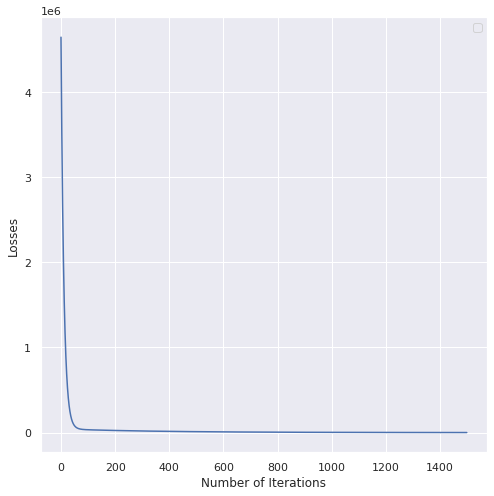

In [34]:
plt.figure(figsize=(8,8))

#your code goes here

w_init = np.linspace(0, 1, 11)
weights, losses = gradDescent(w_init, 1e-8, X, datY)
plt.plot(range(len(losses)), losses)
plt.xlabel('Number of Iterations')
plt.ylabel('Losses')
plt.legend()
plt.show()

Let us check the adequacy of the model we created.

Choose several (no less then five) houses (inputs in your `X` matrix) and calculte predicted prices by:

$$ \hat{y}_i=w_0+w_1x_1+w_2x_2+\ldots+w_mx_m $$

In [11]:
### your code goes here
w_init = np.linspace(0, 1, 11)
weights, losses = gradDescent(w_init, 1e-8, X, datY)
def result_check(random_indexes, X, weights):
    for index in random_indexes:
        print('Predicted:', np.array(X.loc[index]).dot(weights[-1]))
        print('Actual:', datY[index])

random_indexes = [1000, 2457, 5925, 13020, 3958]
result_check(random_indexes, X, weights)

Predicted: -39.412334669740964
Actual: 12.254862809699606
Predicted: 33.088761951460874
Actual: 13.399995114002609
Predicted: 25.798934416952278
Actual: 13.87377946608825
Predicted: 6.1760946904503555
Actual: 13.59553822302392
Predicted: -19.741044910299074
Actual: 13.465953081794405


Compare predicted values with an actual answer (stored in your `y` array). Is it satisfying enough? (**1 point**)

In some way, results coincide to actual results, but seems there is so much parameters for linear reggression and predicted values are only somewhat close to actual values

### Task 6. Data transformation

As you have probably already seen above, the convergence of the gradient descent is not ideal for our data. One way to overcome this is to transform the input data so that:
+ the **average** of each feature should be $0$
+ the **standard deviation** of each feature should be $1$

In such a way levels of the loss function would be close to circles; thus one should hope to faster convergence.

Implement such normalisation:

In [10]:
def norm(X):
    # your code goes here
    norm_X = (X - X.min()) / (X.max() - X.min())
    return norm_X.fillna(0)

In [27]:
norm(X)

,00,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above,sqft_basement,long,lat
0,0.0,0.151515,0.40625,0.253607,0.4,0.50,0.5,0.236726,0.290557,0.392028,0.730578
1,0.0,0.090909,0.21875,0.186029,0.0,1.00,0.4,0.129425,0.309927,0.118769,0.568603
2,0.0,0.090909,0.12500,0.066059,0.0,0.50,0.3,0.096239,0.000000,0.392859,0.441374
3,0.0,0.121212,0.31250,0.174639,0.4,0.50,0.4,0.254425,0.000000,0.158634,0.439601
4,0.0,0.090909,0.28125,0.176917,0.4,0.75,0.5,0.153761,0.227603,0.186877,0.726234
...,...,...,...,...,...,...,...,...,...,...,...
14995,0.0,0.121212,0.34375,0.145786,0.4,0.75,0.4,0.199115,0.029056,0.159464,0.834324
14996,0.0,0.090909,0.25000,0.080486,0.0,0.75,0.5,0.068584,0.106538,0.351328,0.867464
14997,0.0,0.060606,0.12500,0.020501,0.0,0.50,0.3,0.029867,0.000000,0.132888,0.577610
14998,0.0,0.090909,0.12500,0.095672,0.0,1.00,0.4,0.139381,0.000000,0.167771,0.963326


In [12]:
!pip install scikit-learn

     ---------------------------------------- 8.2/8.2 MB 174.1 kB/s eta 0:00:00
     ------------------------------------ 298.0/298.0 kB 216.7 kB/s eta 0:00:00
     -------------------------------------- 40.1/40.1 MB 205.3 kB/s eta 0:00:00


In [21]:
from sklearn import preprocessing
preprocessing.MinMaxScaler().fit_transform(X)

array([[0.        , 0.15151515, 0.40625   , ..., 0.2905569 , 0.39202839,
        0.73057831],
       [0.        , 0.09090909, 0.21875   , ..., 0.30992736, 0.11876941,
        0.56860255],
       [0.        , 0.09090909, 0.125     , ..., 0.        , 0.3928585 ,
        0.44137444],
       ...,
       [0.        , 0.06060606, 0.125     , ..., 0.        , 0.13288765,
        0.57761006],
       [0.        , 0.09090909, 0.125     , ..., 0.        , 0.16777137,
        0.96332566],
       [0.        , 0.06060606, 0.125     , ..., 0.        , 0.09551359,
        0.80022703]])

### Task 7. And again (2 points)

Repeat gradient descent experiments for different $\alpha$s, now with transformed data.

+ Run at least two experiments with different $\alpha$
+ At least two experiments should be convergent

1. Provide `loss` plots for those experiments (on the same graph). (**1 point**)
2. Are optimized weights the same? Illustrate it (plot it or show differences in other way)

Predicted: 13.302500737399317
Actual: 13.457406021215947
Predicted: 13.317917315390162
Actual: 13.59553822302392


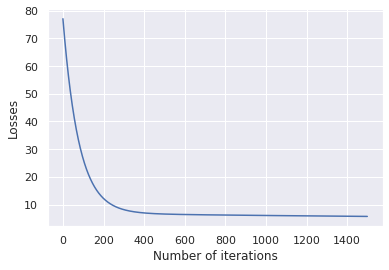

In [54]:
 # experiment 1
w_init1 = np.linspace(-4, 14, 11)
weights1, losses1 = gradDescent(w_init1, 1e-2, norm(X), datY)
plt.plot(range(len(losses1)), losses1)
plt.xlabel('Number of iterations')
plt.ylabel('Losses')

indexes = [349, 13020]
result_check(indexes, norm(X), weights1)

Predicted: 9.932489980253687
Actual: 12.755060730390513
Predicted: 15.831514268471276
Actual: 13.017002861746503


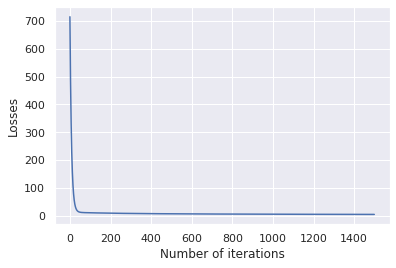

In [56]:
# experiment 2
w_init2 = np.linspace(-1, 23, 11)
weights1, losses1 = gradDescent(w_init2, 1e-1, norm(X), datY)
plt.plot(range(len(losses1)), losses1)
plt.xlabel('Number of iterations')
plt.ylabel('Losses')

indexes = [2469, 12137]
result_check(indexes, norm(X), weights1)

With normalized data, $ \alpha $ optimal value is actually changed, since we changed the scale of data. Optimal $ \alpha $ is somewhere around 1e-2.

### Task 8. Better pay twice  (1 point)

Sometimes it is essential to alter the loss function and make it assymetric. Normally, it is motivated by the task itself. For instance, in our case assume that one uses our prediction to bid for an apartment: hence if our $\hat{y}>y$ then we will overpay, but if $\hat{y}<y$ we will not get an apartment, but also won't lose any money. 

Let us introduce our new function:
$$
Loss(\vec{w})=\frac{1}{N}\sum_{i=1}^N \begin{cases} a(y_i-\hat{y}_i)^2, \quad y_i>\hat{y}_i \\ b(y_i-\hat{y}_i)^2, \quad y_i\le\hat{y}_i \end{cases}
$$

Implement new loss and new gradient:

In [19]:
def new_loss(w, X, y, a, b):
    val_X = X.dot(w)
    return np.sum(np.piecewise([val_X, y], [err := y - val_X > 0, err <= 0],
                               [lambda err: a * err ** 2, lambda err: b * err ** 2])) / X.shape[0]

def new_grad(w_k, X, y, a, b):
    # your code goes here
    val_X = X.dot(w_k)
    loss = val_X - y
    loss_with_ab = np.where(loss < 0, loss * a, loss * b)
    lossGradient = X.T.dot(loss_with_ab) / (2 * N)
    return lossGradient

### Task 9. More experiments! (2 points)

Now let us experiment with new functions (**2 points**)

1. Assume your data was normalised (otherwise repeat **Task 6**)
2. Select at least two pairs of $(a,b)$ parameters such that $a_1/b_1>1$ and $a_2/b_2<1$
3. Run **gradient descent** with new function and given parameters
4. Make a `loss` plot for each expriment (please, provide legend!)
5. Check whether you've got coinciding weights and _illustrate_ it

You may also alter $\alpha$ and provide more experiments on composite relation between $a/b$ and $\alpha$ values (_optional_).

Experiment #1
Predicted: 16.614432349277052
Actual: 13.764217263576723
Predicted: 15.848789494594836
Actual: 13.017002861746503
Predicted: 11.208573271938844
Actual: 13.34230179776959
Predicted: 12.876151943387882
Actual: 13.102160670086809
Predicted: 12.264436996889323
Actual: 13.195613839143922
Experiment #2
Predicted: 12.466999000984387
Actual: 13.764217263576723
Predicted: 13.11421168347972
Actual: 13.017002861746503
Predicted: 9.149725619428262
Actual: 13.34230179776959
Predicted: 10.23285966604645
Actual: 13.102160670086809
Predicted: 10.420145103963572
Actual: 13.195613839143922


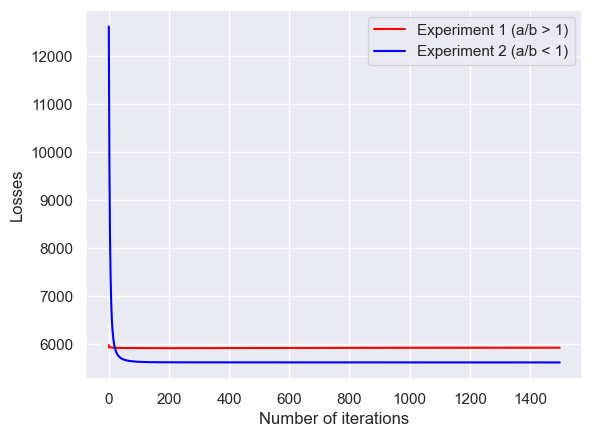

In [62]:
# your code goes here
a1, b1 = 20, 15
a2, b2 = 1, 32
w_init1 = np.linspace(-4, 14, 11)
def new_gradDescent(w_init, alpha, X, y, a, b, maxiter=1500, eps=1e-2):
    losses = []
    weights = [w_init]

    w_k = weights[-1]

    # your code goes here
    for d in range(maxiter):
        w_k = w_k - alpha * new_grad(w_k, X, y, a, b)
        lossValue_k = new_loss(w_k, X, y, a, b)
        w_k_length = np.linalg.norm(w_k)
        if w_k_length < eps:
            break
        weights.append(w_k)
        losses.append(lossValue_k)

    return weights, losses
weights_n_1, losses_n_1 = new_gradDescent(w_init1, 1e-1, norm(X), datY, a1, b1)
weights_n_2, losses_n_2 = new_gradDescent(w_init1, 1e-2, norm(X), datY, a2, b2)
plt.plot(range(len(losses_n_1)), losses_n_1, color='red')
plt.plot(range(len(losses_n_2)), losses_n_2, color='blue')
plt.xlabel('Number of iterations')
plt.ylabel('Losses')
plt.legend(['Experiment 1 (a/b > 1)', 'Experiment 2 (a/b < 1)'], loc='upper right')

indexes = [4290, 12137, 320, 3862, 12452]
print('Experiment #1')
result_check(indexes, norm(X), weights_n_1)
print('Experiment #2')
result_check(indexes, norm(X), weights_n_2)

### Task 10. Discussion (1 point)
Answer following questions:
1. Have you managed to get sufficiently different weights with different $\alpha$ or $(a,b)$ parameters of assymetry? What does it mean?
2. Assume $a$ and $b$ are not given by the task and you need to choose them with the data. Propose a strategy of doing that (assume $a=1$ and choosing only $b$).

1. I've managed to get different results with different $ \alpha $ and different (a,b), set by rules from Task 9.2. Alphas, like coefficeient which affects the step of grad descent are significantly changes results. For another side, (a,b) pairs are changing result, but in another way. Bigger values of a or b creates a significant error in beginning of grad descent, bur from results of experiments, case where a/b < 1 and $ a \bigger 0, b \bigger 0 $ gives smaller loss.

2. From results I've recieved, the case a/b < 1 is more effective. Optimal can be found simultaneously with completing algo of grad descent, using as step a power of 2. After loss starts to increase or not chancing, stop increasing of coefficient b and continue grad descent algorithm.
